# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Reading data frame and understanding data

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)  # Dropping, Unnamed: 0 column

In [7]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
df.sample(10)

,TV,radio,newspaper,sales
65,69.0,9.3,0.9,9.3
130,0.7,39.6,8.7,1.6
183,287.6,43.0,71.8,26.2
28,248.8,27.1,22.9,18.9
6,57.5,32.8,23.5,11.8
38,43.1,26.7,35.1,10.1
199,232.1,8.6,8.7,13.4
54,262.7,28.8,15.9,20.2
86,76.3,27.5,16.0,12.0
84,213.5,43.0,33.8,21.7


In [9]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

As per problem statement, output variable in continuous number. So it is regression problem.

# Exploring five number summery of data

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.shape

(200, 4)

In [161]:
df.drop_duplicates(inplace=True)

# EDA

## Scatterplot 

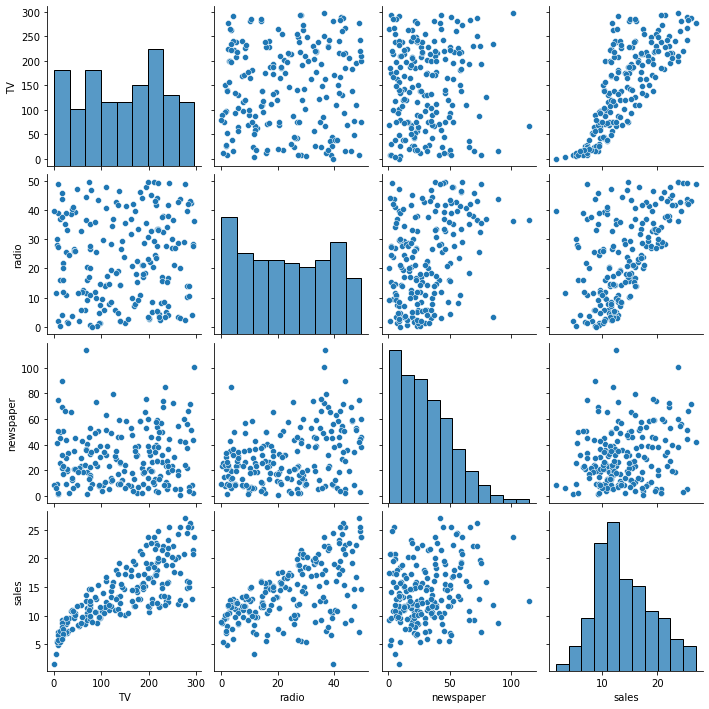

In [12]:
sns.pairplot(df)

## Observations:

### From above results it is clear that all the independant variables have someehat positive relationship with sales/target feature

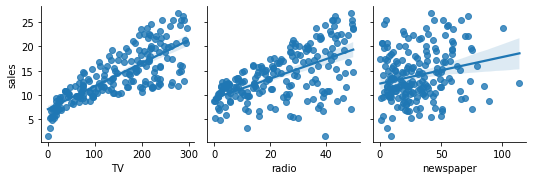

In [13]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',aspect=1, kind='reg')

<AxesSubplot:xlabel='TV', ylabel='sales'>

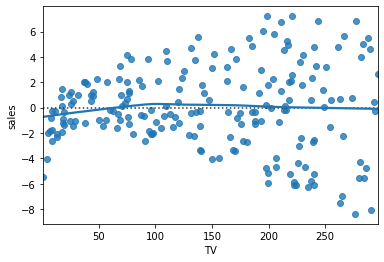

In [18]:
# This function will regress y on x and then draw a scatterplot of the residuals.

sns.residplot(x = df['TV'], y = df["sales"], lowess = True)

In [14]:
# checking null values
print('Total Number of missing values in data set are', df.isnull().sum().sum())

Total Number of missing values in data set are 0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# Checking correlation

<AxesSubplot:>

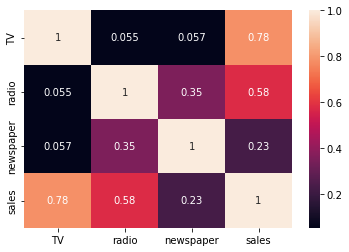

In [16]:
sns.heatmap(df.corr(), annot=True)

### Observations:
1. It is clear that there is relation between TV and Sales.
2. Individually Less relation between newspaper and radio

In [89]:
df.corr()["sales"].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

## Observations:

### TV showing high positive correlation with the sales/target variable apart from 'TV'.

### It looks like the features column is showing multi collinearity between newspaper and radio. We will use VIF method to check multi collinearity

# Checking Outliers

<AxesSubplot:>

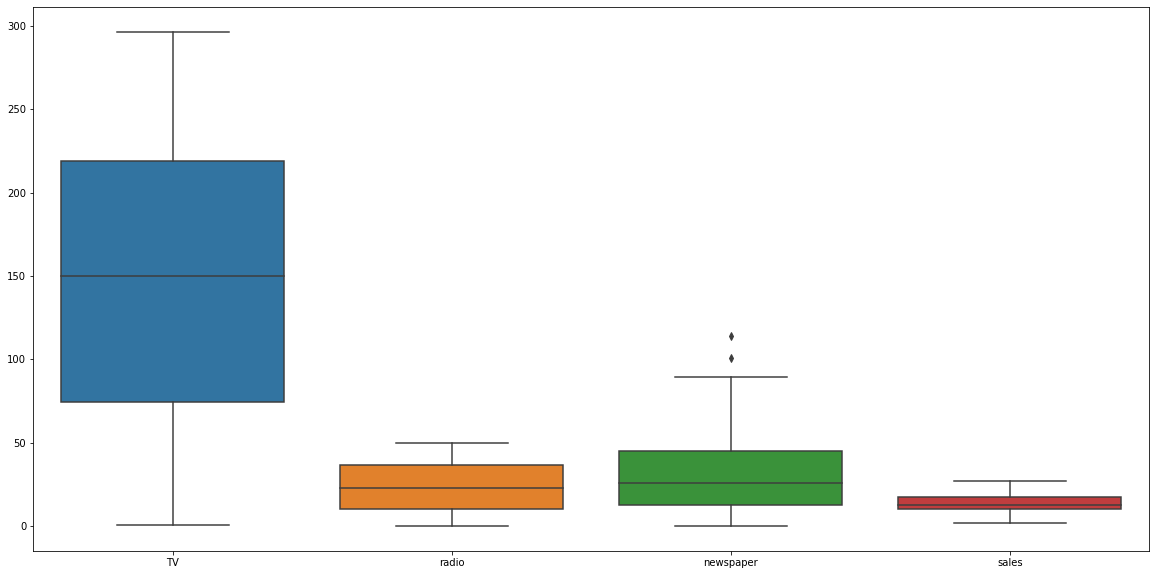

In [90]:
rcParams['figure.figsize'] = 20, 10
sns.boxplot(data = df)

## Observation
### Only 2 Outliers present in data set, and should be processed before modelling

TV              AxesSubplot(0.125,0.657941;0.168478x0.222059)
radio        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
newspaper    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
sales        AxesSubplot(0.731522,0.657941;0.168478x0.222059)
dtype: object

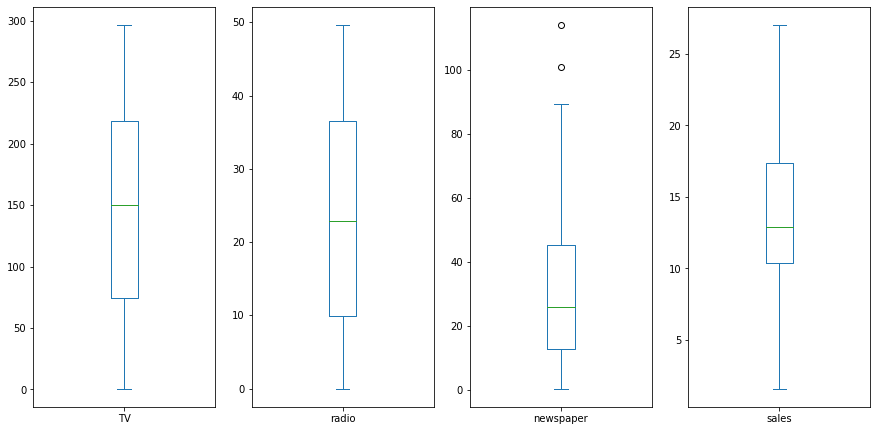

In [91]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))
# plotting individual graph for better understanding of graph

## observations:
### In feature "sale" outliers are present. Rest of the data has no outliers

# Skewness Checking

<AxesSubplot:xlabel='TV', ylabel='Density'>

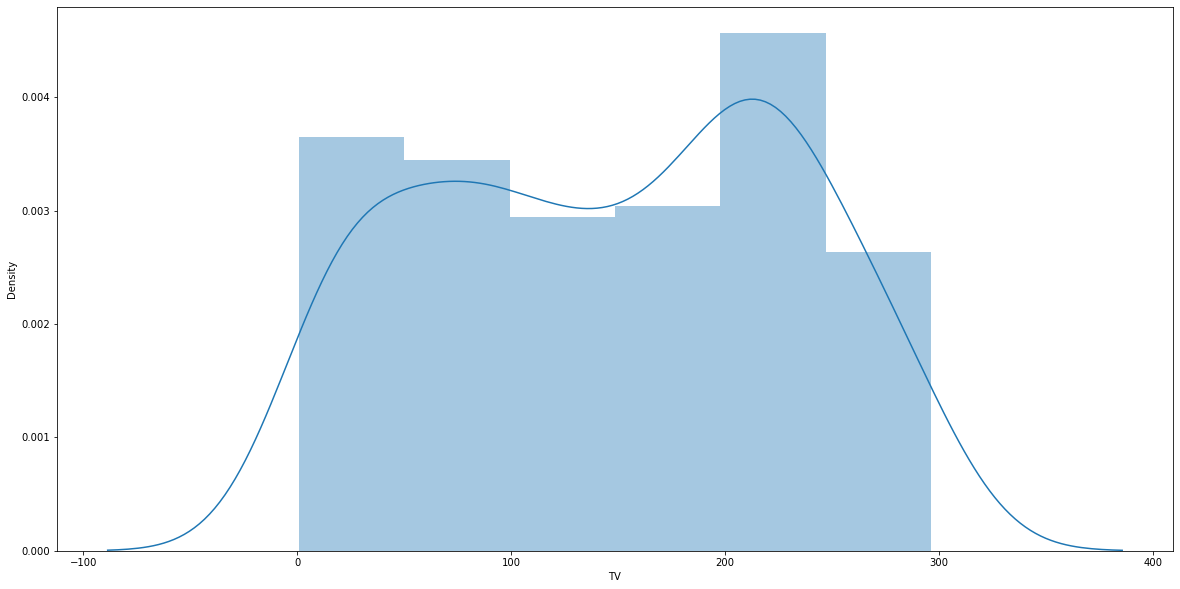

In [92]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

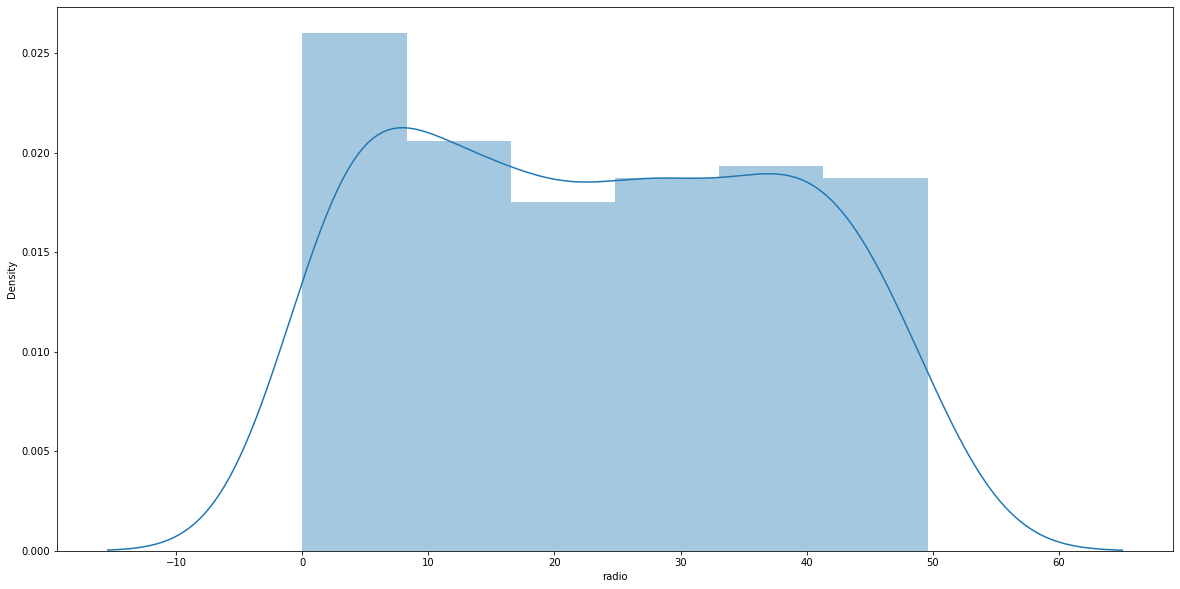

In [93]:
sns.distplot(df['radio'])

Data is left skewed

<AxesSubplot:xlabel='sales', ylabel='Density'>

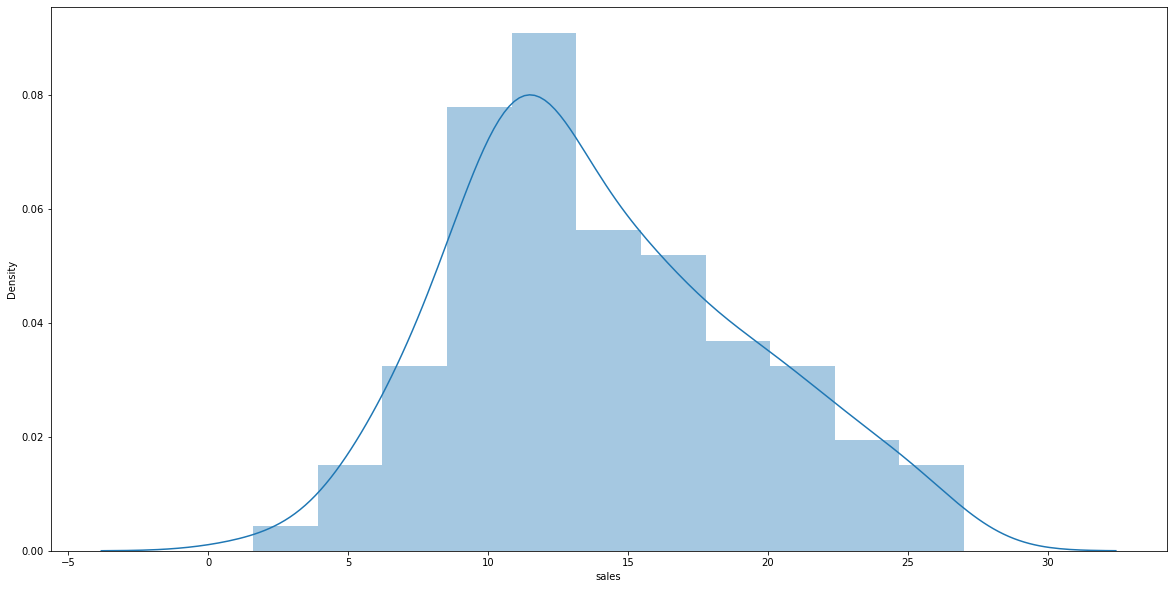

In [94]:
sns.distplot(df['sales'])

Data is left skewed

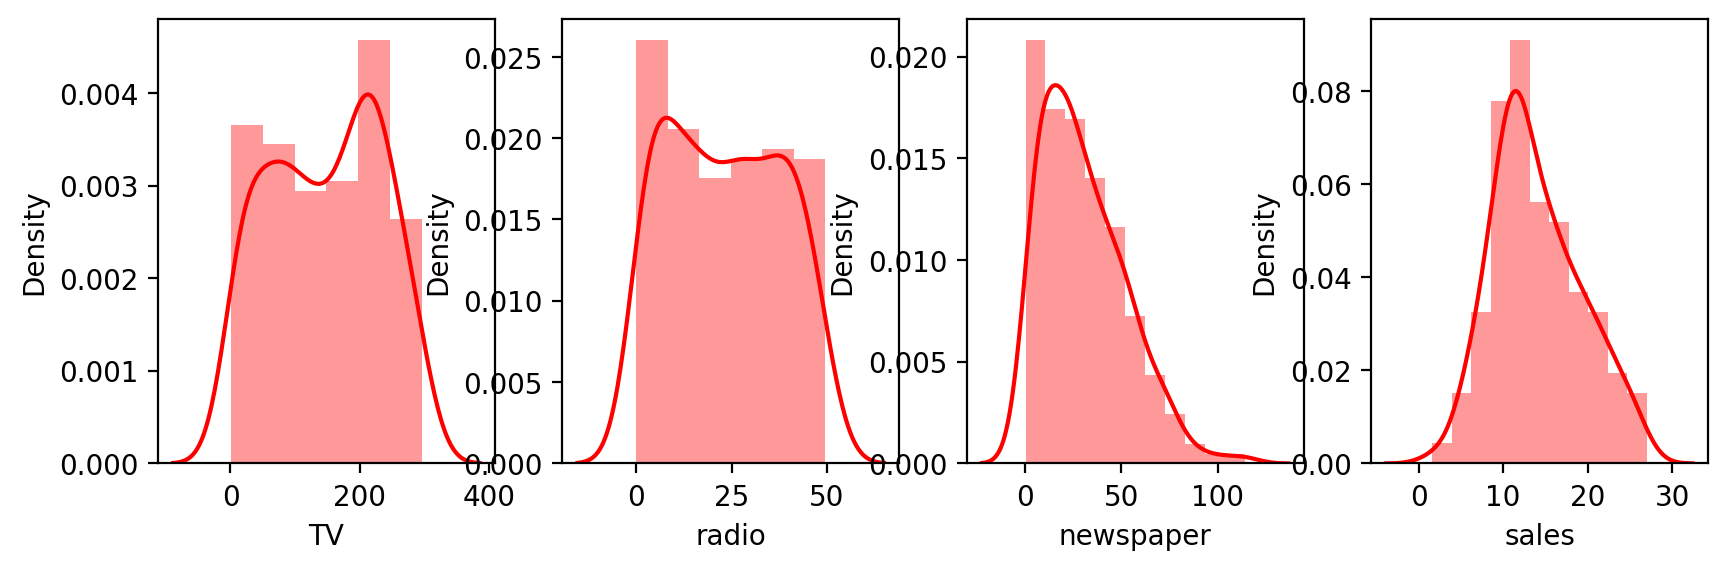

In [95]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(df[df.columns]):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

# Histograms

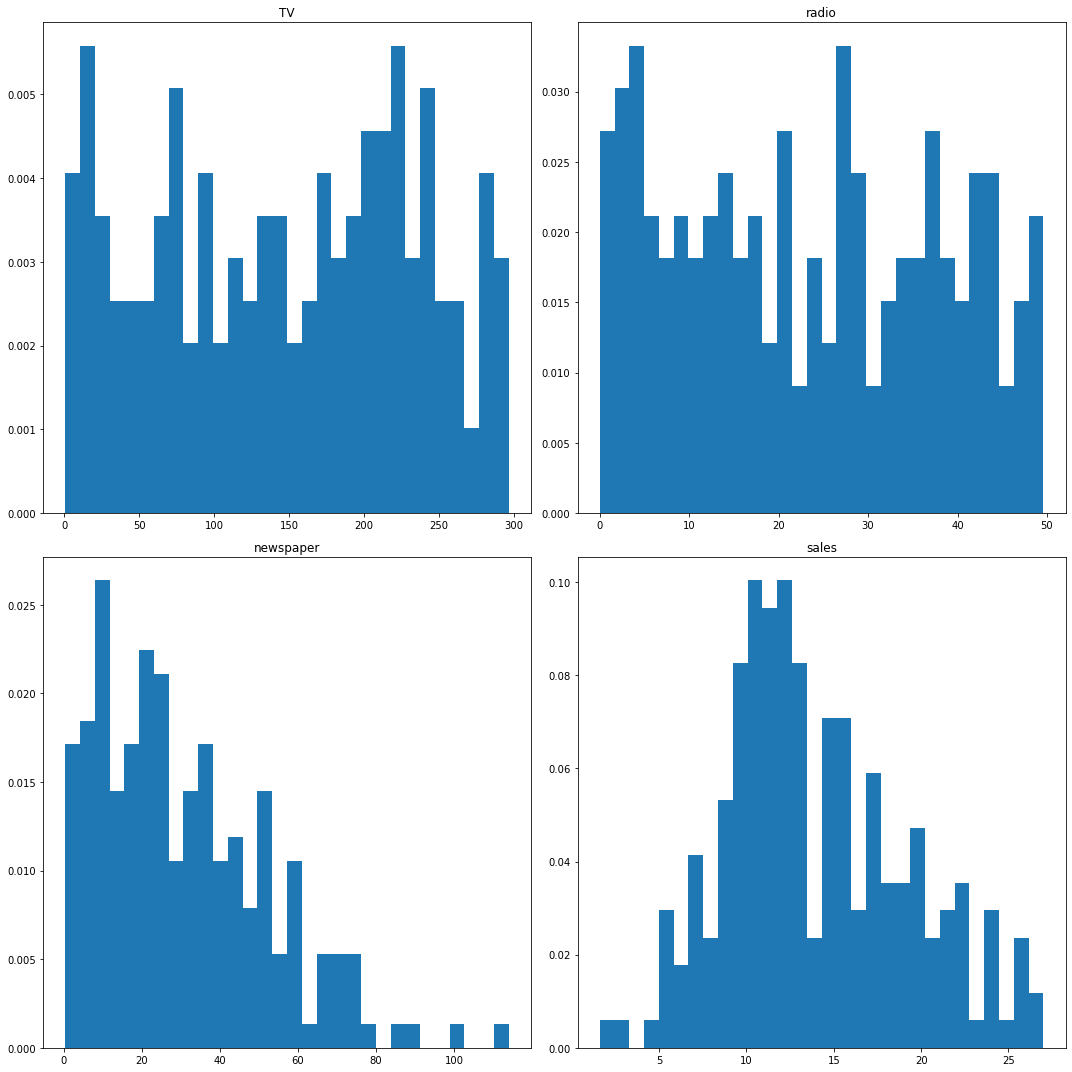

In [96]:
plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins = 30, density = 'True', label = 'Value',histtype = 'stepfilled', grid=False)
plt.tight_layout()
plt.show()

### In histogram we can see if any section is empty such as in Rings 15 number there was not enough data collected also we can see the skewness.

In [97]:
df.skew().sort_values()

TV          -0.069853
radio        0.094175
sales        0.407571
newspaper    0.894720
dtype: float64

Observations:

Skewness threshold usually taken as -0.5 to 0.5

referring the above distplot and histogram graphs and values we can use this model for further processing.

# MultiCollinearity with Variance Inflation Factor

In [98]:
df1=pd.DataFrame(data=df)       # copying the dataframe
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [99]:
x1=df1.iloc[:,:-1]  # Dropping last column from data frame
y1=df1.iloc[:,-1]

In [100]:
x1

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [101]:
y1

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [102]:
x1.shape

(200, 3)

In [103]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [104]:
calc_vif(x1)

,variables,VIF FACTOR
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


Observations:
There is no multi collinearity between features.

<AxesSubplot:>

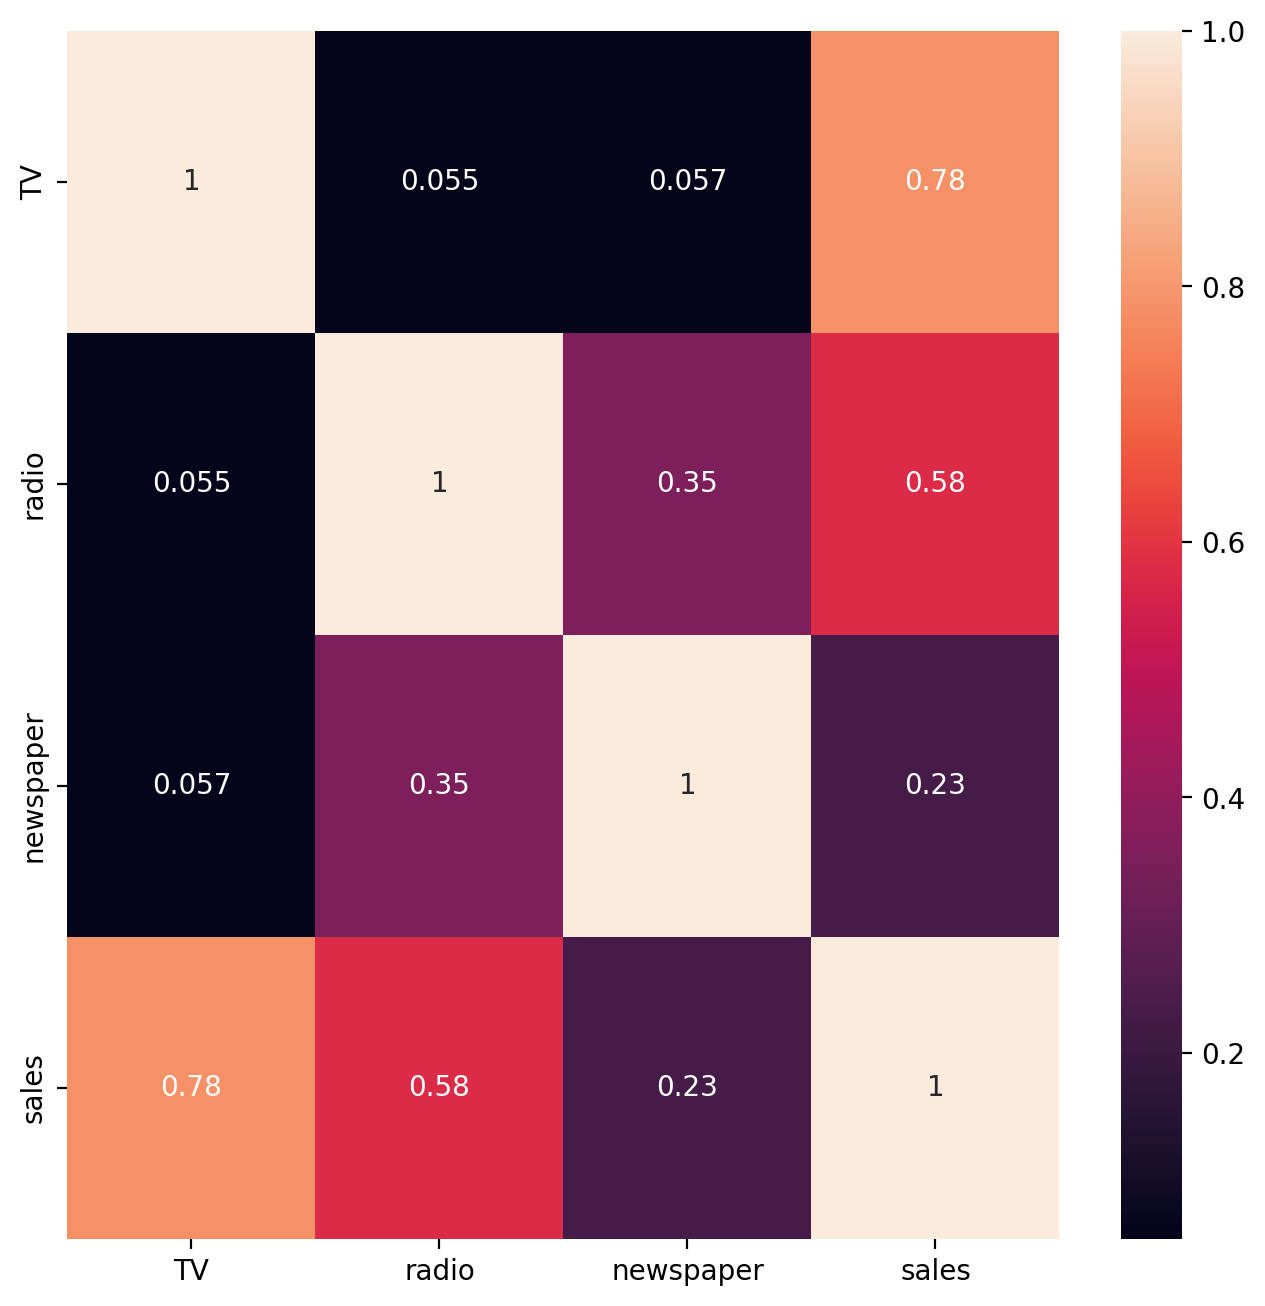

In [105]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

# Removing Outliers

In [106]:
z=np.abs(zscore(df))
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [107]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [108]:
z.iloc[3,3]

0.8603302865487782

In [109]:
z.shape

(200, 4)

In [110]:
len(np.where(z>3)[0])

2

In [111]:
# removing outliers
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (200, 4)
New Dataframe (198, 4)
total_dropped_rows 2


# Percentage data loss:

In [112]:
loss_percent=(200-198)/200*100
print(loss_percent,'%')

1.0 %


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set 1 % data loss is acceptable.

## Splitting the dataset into Features and Target

In [115]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [116]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [117]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [118]:
X.skew().sort_values()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

Observations:

Since the skewness is almost within permissible ranges and the outlier data are a real value we have proceeded with the X independant variables as it 

## Scaling the independant variable (x) to get all the columns in a standard scale

In [119]:
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

since the different columns were out of scale we performed scaling operation on all the independant variables columns to bring it into the same scale.

We used Standard Scaler method to ensure all my independant variables columns have been standardized.

In [120]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [121]:
x = pd.DataFrame(x1,columns=X.columns)

In [122]:
x

,TV,radio,newspaper
0,0.978697,0.989521,1.932998
1,-1.199012,1.090705,0.751313
2,-1.519332,1.535913,1.937901
3,0.056456,1.225616,1.408349
4,0.400243,-0.831784,1.403446
...,...,...,...
193,-1.272932,-1.310720,-0.783407
194,-0.615864,-1.229773,-1.062892
195,0.355657,-0.932968,-1.146248
196,1.606431,1.272836,1.785900


# <span style="color:red;">Data is ready for Machine Learning Models</span>

# Since the y (Target) has continuous values we will use Linear Regression model

### Finding Best Random State

In [123]:
lr = LinearRegression()

In [124]:
random_state = []
training_accuracy = []
testing_accuracy = []

In [125]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))

In [126]:
lr_acc = pd.DataFrame()

In [127]:
lr_acc['random_state'] = random_state
lr_acc['training_accuracy'] = training_accuracy
lr_acc['testing_accuracy'] = testing_accuracy

In [128]:
lr_acc.sort_values('testing_accuracy').tail(1)

,random_state,training_accuracy,testing_accuracy
89,90,0.88,0.95


It is clear that for random state 90, we have highest testing accuracy

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=90)

In [130]:
lr.fit(x_train,y_train)

LinearRegression()

In [131]:
pred_test = lr.predict(x_test)

In [132]:
print(r2_score(y_test,pred_test))

0.9477136584598765


## Cross Validation of the model

In [133]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8886177292201751
accuracy score for training is -0.788460915297821
accuracy score for testing is 0.9477136584598765


At cross fold 3 the cv score is 0.8890406332045907
accuracy score for training is -0.788460915297821
accuracy score for testing is 0.9477136584598765


At cross fold 4 the cv score is 0.8880501918930908
accuracy score for training is -0.788460915297821
accuracy score for testing is 0.9477136584598765


At cross fold 5 the cv score is 0.8853605756683912
accuracy score for training is -0.788460915297821
accuracy score for testing is 0.9477136584598765


At cross fold 6 the cv score is 0.8868174285063072
accuracy score for training is -0.788460915297821
accuracy score for testing is 0.9477136584598765


At cross fold 7 the cv score is 0.883828289486476
accuracy score for training is -0.788460915297821
accuracy score for testing is 0.9477136584598765


At cross fold 8 the cv score is 0.888033455415022
accuracy score for training is -0.78846

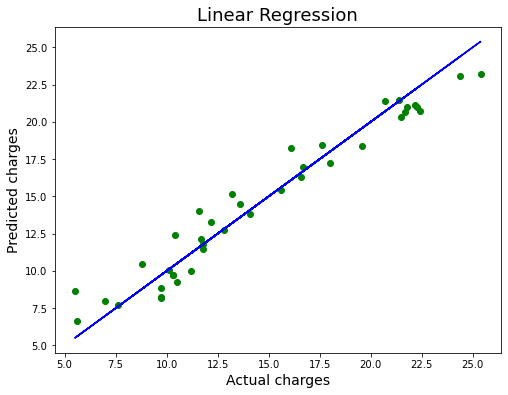

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The best fit line covering more than 75.0% of the points

## importing all the required libraries

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [136]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

# Tuning parameter for better results

### Linear Regression

In [137]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 2.067981449916982
R2 Score is: 85.92963033296425
Cross Validation Score is: 88.53605756683912
R2 Score - Cross Validation Score is -2.606427233874868


### L1 -- Lasso Regression

In [138]:
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.0680079560363653
R2 Score is: 85.92926963989488
Cross Validation Score is: 88.5363671166451
R2 Score - Cross Validation Score is -2.607097476750212


### L2 -- Ridge Regression

In [139]:
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.067982257408847
R2 Score is: 85.92961934475034
Cross Validation Score is: 88.53605882462251
R2 Score - Cross Validation Score is -2.6064394798721793


### Elastic Net

In [140]:
model=ElasticNet(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.0680584622037452
R2 Score is: 85.92858234337001
Cross Validation Score is: 88.53631750920782
R2 Score - Cross Validation Score is -2.607735165837809


# Support Vector Regression

In [141]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 2.1263995228797206
R2 Score is: 85.123459035708
Cross Validation Score is: 91.05355050541174
R2 Score - Cross Validation Score is -5.93009146970374


In [142]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 2.4277555968059485
R2 Score is: 80.60801984002971
Cross Validation Score is: 80.02650275443585
R2 Score - Cross Validation Score is 0.581517085593859


In [143]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 2.147331107858528
R2 Score is: 84.8291378727518
Cross Validation Score is: 87.59677907869423
R2 Score - Cross Validation Score is -2.767641205942425


# Decision Tree Regressor

In [144]:
model=DecisionTreeRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 1.1558546621439911
R2 Score is: 95.60439470051546
Cross Validation Score is: 95.07894328078767
R2 Score - Cross Validation Score is 0.5254514197277871


# Random Forest Regressor

In [145]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.9358164349913918
R2 Score is: 97.1186662496435
Cross Validation Score is: 97.5883007746219
R2 Score - Cross Validation Score is -0.4696345249784031


# K Neighbors Regressor

In [146]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1.6143171931191223
R2 Score is: 91.42587176454887
Cross Validation Score is: 93.67560788064591
R2 Score - Cross Validation Score is -2.24973611609704


# SGD Regressor

In [147]:
model=SGDRegressor(penalty='l1', learning_rate='optimal')
regressor(model, x, y)

Root Mean Square Error is: 171093144560.70026
R2 Score is: -9.631134478886531e+22
Cross Validation Score is: -2.3002817715010084e+24
R2 Score - Cross Validation Score is 2.2039704267121432e+24


# Gradient Boosting Regressor

In [148]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.862525054100122
R2 Score is: 97.55231420039884
Cross Validation Score is: 97.81595165067975
R2 Score - Cross Validation Score is -0.26363745028091046


# Ada Boost Regressor

In [149]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 1.196000484318607
R2 Score is: 95.29375056711544
Cross Validation Score is: 95.39180729645611
R2 Score - Cross Validation Score is -0.09805672934066934


# Extra Trees Regressor

In [150]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 1.6678621725318066
R2 Score is: 90.8476515148243
Cross Validation Score is: 93.79335478244798
R2 Score - Cross Validation Score is -2.9457032676236707


# Hyper parameter tuning

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

## For Lasso Regressor

In [152]:
parameters = {'alpha':[100, 300], 'selection': ['cyclic', 'random'], 'max_iter': [500, 1000], 'random_state': [100, 500]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 100, 'max_iter': 500, 'random_state': 100, 'selection': 'cyclic'}


In [153]:
ls=Lasso(alpha=100,random_state=100,max_iter=500,selection='cyclic')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

ls1 = r2_score(y_test,pred_ls)
ls1

-0.03881127690826092

In [154]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.012081256739689428

## For Random Forest Regressor

In [155]:
parameters = {'criterion':['mse','mae'], 'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [156]:
rf=RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Validation Score:',rfc*100)

R2 Score: 87.66172930136901
Cross Validation Score: 90.82471288606658


# For Gradient Boosting

In [157]:
clf_gb=GridSearchCV(estimator=GradientBoostingRegressor(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [500]})

In [158]:
clf_gb.best_score_

0.9756539706651818

In [159]:
clf_gb.best_params_

{'n_estimators': 500}

In [160]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076595,0.005677,0.0,0.0,500,{'n_estimators': 500},0.987406,0.980067,0.982663,0.981469,0.955689,0.987133,0.981508,0.966746,0.990282,0.943577,0.975654,0.014586,1


# Decision Tree Regressor Model Performing with 95% Accuracy

In [162]:
model=DecisionTreeRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 1.1558546621439911
R2 Score is: 95.60439470051546
Cross Validation Score is: 95.07894328078767
R2 Score - Cross Validation Score is 0.5254514197277871
